In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:

from sklearn.preprocessing import LabelEncoder
from numpy import interp

In [7]:
df = pd.read_csv("german_credit_data.csv")

In [8]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [9]:
# checking data for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


In [10]:
#unique values
print(df.nunique())

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64


In [11]:
# number of missing values
missing = df.isnull().sum()
print(missing)


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [12]:
# missing values replaced with mode
df["Saving accounts"].fillna(df['Saving accounts'].mode()[0], inplace=True)
df["Checking account"].fillna(df['Checking account'].mode()[0], inplace=True)

In [13]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,little,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [14]:
#creating new dataset just to be sure
df_credit = df.copy()

In [15]:
# prepering dependend variable to dummy
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,little,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [16]:
# change into numeric 0 and 1
for col in ["Risk"]:
    le = LabelEncoder()
    le.fit(df_credit[col])
    df_credit[col] = le.transform(df_credit[col])
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,2,49,male,1,own,little,little,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,0


In [17]:
#prepering the explained variable
df_y = df[['Risk']]
df_y.head()
print(df_y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Risk    1000 non-null   int32
dtypes: int32(1)
memory usage: 4.0 KB
None


In [18]:
#drop unnamed
df_credit = df_credit.drop(["Unnamed: 0"], axis=1)
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,little,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


In [ ]:
# computing WOE and merging categories with similar distribution of good and bad into bins

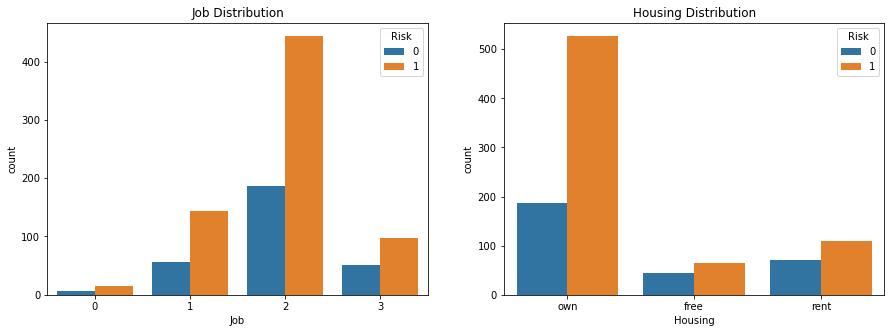

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df_credit,hue="Risk", x="Job", ax=ax[0]).set_title("Job Distribution");
sns.countplot(data=df_credit, x="Housing",hue="Risk", ax=ax[1]).set_title("Housing Distribution");


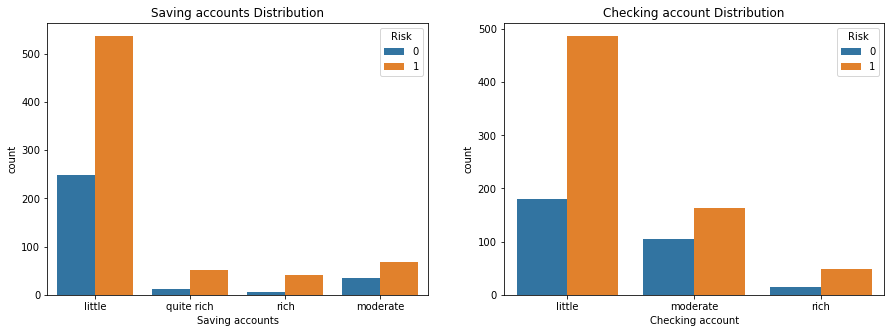

In [20]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df_credit, x="Saving accounts",hue="Risk", ax=ax[0]).set_title("Saving accounts Distribution");
sns.countplot(data=df_credit, x="Checking account", hue="Risk", ax=ax[1]).set_title("Checking account Distribution");

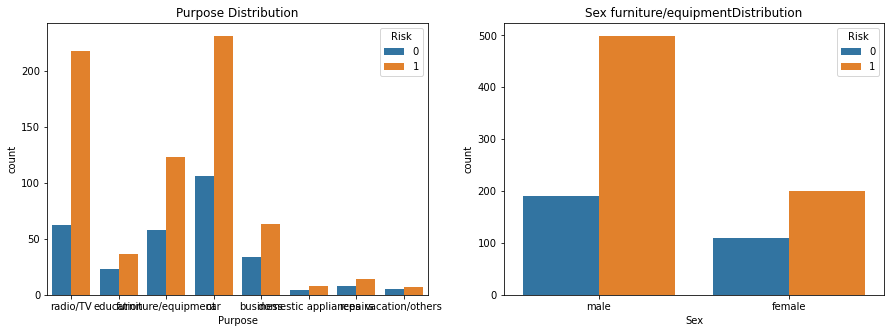

In [21]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df_credit, x="Purpose",hue="Risk", ax=ax[0]).set_title("Purpose Distribution");
sns.countplot(data=df_credit, x="Sex", hue="Risk", ax=ax[1]).set_title("Sex furniture/equipmentDistribution");

In [63]:
#binning for job
df_credit['Job'] = df_credit['Job'].replace(['0', '1', '2', '3'],['Unskilled', 'Unskilled', 'Skilled', 'Highly Skilled'])

In [64]:
#binning for Saving accounts
df_credit['Saving accounts'] = df_credit['Saving accounts'].replace(['little' ,'moderate', ' quite rich', 'rich'],['little', 'moderate', 'rich', 'rich'])

In [60]:
#binning for purpose
df_credit['Purpose'] = df_credit['Purpose'].replace(['business','car', 'domestic appliances', 'education', 'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'],['business','car', 'furniture/equipment', 'education', 'furniture/equipment', 'radio/TV', 'others', 'others'])

In [65]:
print(df_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               6
Risk                  2
dtype: int64


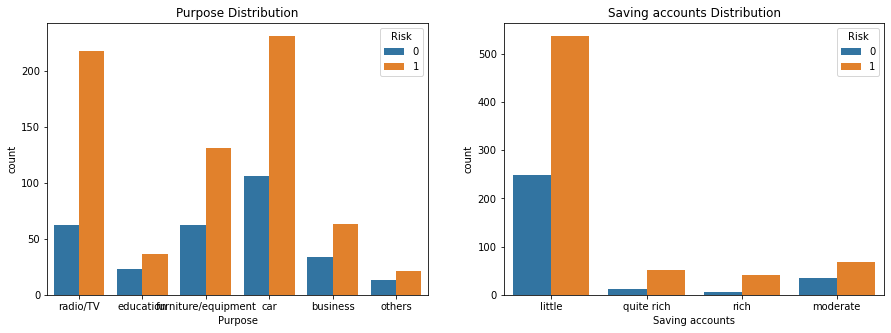

In [61]:
# plots just to check
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df_credit, x="Purpose",hue="Risk", ax=ax[0]).set_title("Purpose Distribution");
sns.countplot(data=df_credit, x="Saving accounts", hue="Risk", ax=ax[1]).set_title("Saving accounts Distribution");

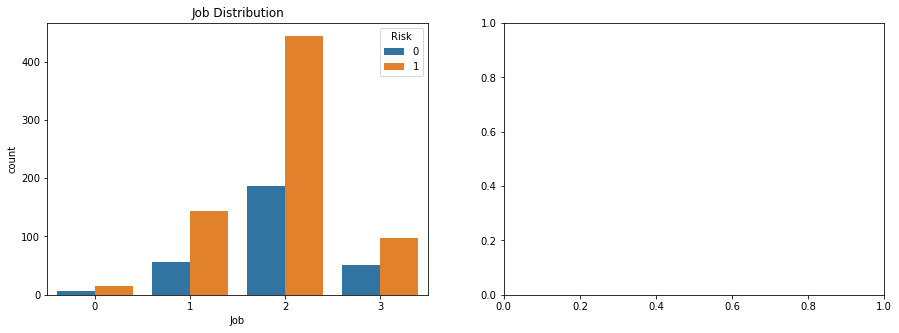

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df_credit, x="Job", hue="Risk", ax=ax[0]).set_title("Job Distribution");

Methods we can use:

Random Forest Classifier <br>
Logistic Regression models<br>
Decision Tree Classifier<br>
K-Nearest Neighbors Classifier<br>
Random Forest Classifier<br>
Gaussian Naive Bayes<br>
SVC<br>

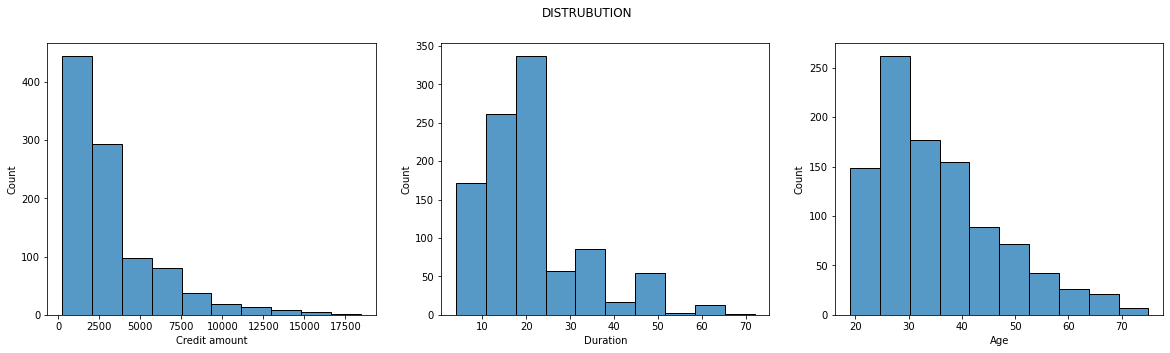

In [167]:
#distribution
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('DISTRUBUTION')
sns.histplot(df_credit['Credit amount'], bins=10, ax=ax[0]);
sns.histplot(df_credit['Duration'], bins=10, ax=ax[1]);
sns.histplot(df_credit['Age'], bins=10, ax=ax[2],);

In [55]:
#standardization by log
#also option to make age categorical
num_df_credit = df_credit[['Age', 'Duration', 'Credit amount']]
num_df = np.log(num_df)

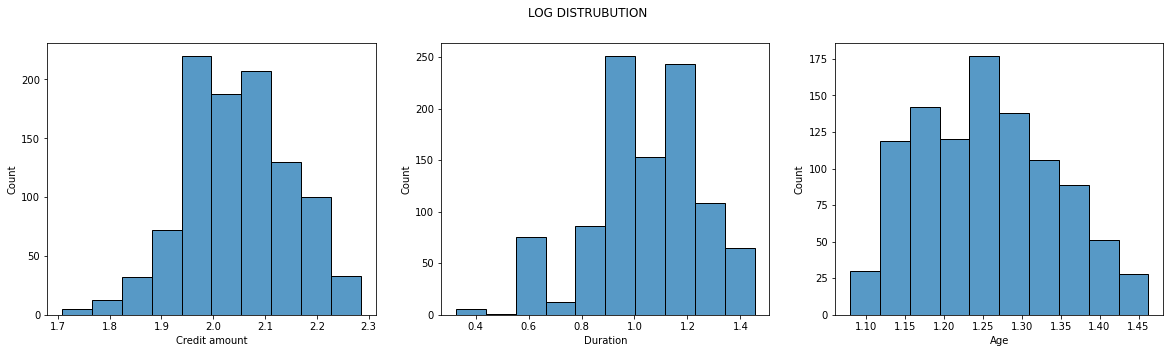

In [164]:
#plots for logs
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('LOG DISTRUBUTION')
sns.histplot(num_df['Credit amount'], bins=10, ax=ax[0]);
sns.histplot(num_df['Duration'], bins=10, ax=ax[1]);
sns.histplot(num_df['Age'], bins=10, ax=ax[2],);

In [73]:

#Creating the X and y variables
x = df_credit.drop('Risk', axis=1)
y = df_credit['Risk']


In [93]:
# importing for splitting Test and train
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV  
from sklearn.tree import DecisionTreeRegressor


In [112]:
#splitting
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state = 0)

In [124]:

x.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [113]:
#check of the split
print('xtrain shape: ', X_train.shape)
print('xtest shape: ', x_test.shape)
print('ytrain shape: ', y_train.shape)
print('ytest shape: ', y_test.shape)

xtrain shape:  (750, 10)
xtest shape:  (250, 10)
ytrain shape:  (750,)
ytest shape:  (250,)


In [114]:
#we are going to use this to evalueta the model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score 

In [135]:
#now we need to select the methods , first step is importing the algorythms , then comparing, then choosing the best one
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import KFold

In [136]:
seed = 42

In [158]:
# running the models
models = []
models.append(('LGR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

LGR: nan (nan)
LDA: nan (nan)
KNN: nan (nan)
CART: nan (nan)
NB: nan (nan)
RF: nan (nan)


C:\Users\hhh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hhh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hhh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1344, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "C:\Users\hhh\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\hhh\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hhh\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(X, accept_sparse=a

<Figure size 792x432 with 0 Axes>

<Figure size 792x432 with 0 Axes>

<Figure size 792x432 with 0 Axes>

<Figure size 792x432 with 0 Axes>

<Figure size 792x432 with 0 Axes>

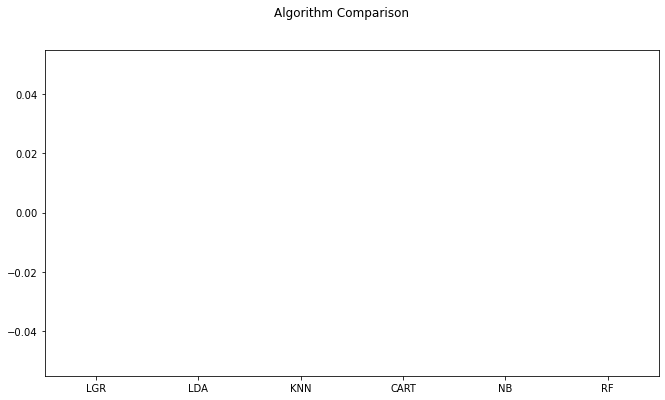

In [162]:
# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        cv = KFold(n_splits=10, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()